C:\Users\RJNGh\AppData\Local\Temp\ipykernel_17652\343981379.py:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(angles, radii, c='blue', cmap='hsv', alpha=0.75, s=100)


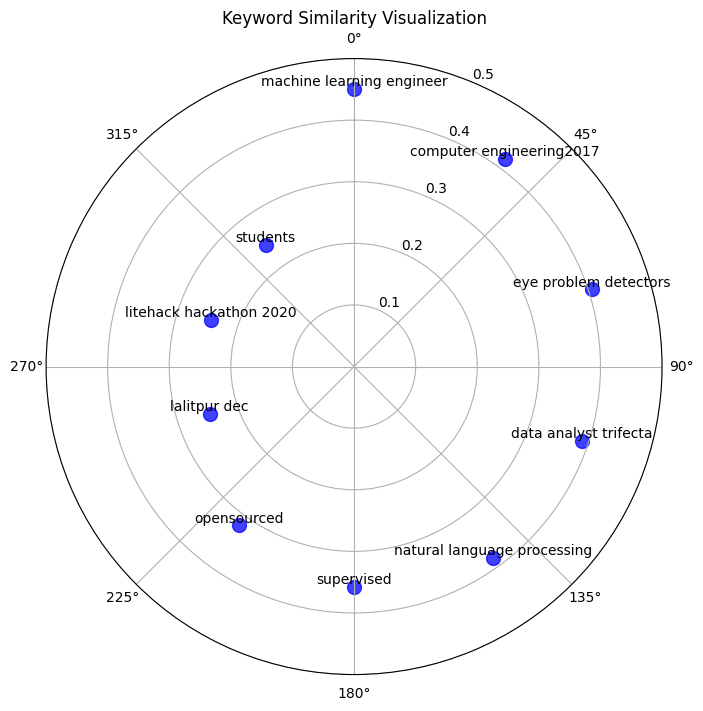

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Your data
data = [
    ["machine learning engineer", 0.4512],
    ["computer engineering2017", 0.416],
    ["eye problem detectors", 0.4058],
    ["data analyst trifecta", 0.389],
    ["natural language processing", 0.3838],
    ["supervised", 0.3581],
    ["opensourced", 0.3188],
    ["lalitpur dec", 0.2467],
    ["litehack hackathon 2020", 0.2447],
    ["students", 0.2444]
]

# Extracting keywords and similarities
keywords, similarities = zip(*data)

# Normalize the similarities to fit the plot dimensions
# Here, we simply use the similarity score as the radius since it's already between 0 and 1
radii = similarities

# Calculate angles for the keywords
angles = np.linspace(0, 2 * np.pi, len(keywords), endpoint=False)

# Plotting
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': 'polar'})
ax.scatter(angles, radii, c='blue', cmap='hsv', alpha=0.75, s=100)

# Add labels
for angle, radius, keyword in zip(angles, radii, keywords):
    ax.text(angle, radius, keyword, horizontalalignment='center', verticalalignment='bottom')

# Customize the plot
ax.set_ylim(0, 0.5)  # Adjust if needed based on your max similarity score
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

plt.title('Keyword Similarity Visualization')
plt.show()


AttributeError: 'Text' object has no property 'font_weight'

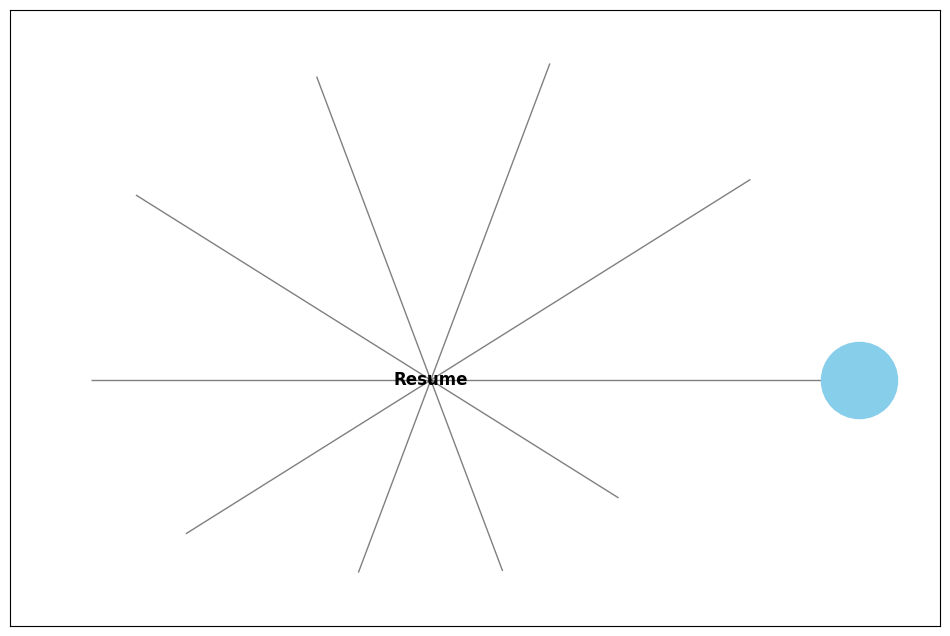

In [5]:
import matplotlib.pyplot as plt
import networkx as nx

# Data
keywords = [
    "machine learning engineer",
    "computer engineering2017",
    "eye problem detectors",
    "data analyst trifecta",
    "natural language processing",
    "supervised",
    "opensourced",
    "lalitpur dec",
    "litehack hackathon 2020",
    "students"
]

# Similarity scores (normalized for visualization purposes)
# They could be used to determine the length of the edges if needed
similarity_scores = np.array([0.4512, 0.416, 0.4058, 0.389, 0.3838, 0.3581, 0.3188, 0.2467, 0.2447, 0.2444])

# Create a new graph
G = nx.Graph()

# Add a node for the resume
G.add_node("Resume")

# Add nodes and edges for each keyword
for keyword, score in zip(keywords, similarity_scores):
    G.add_node(keyword)
    G.add_edge("Resume", keyword, weight=score)

# Positioning the central node at the origin and others on the circumference of a circle
pos = { "Resume": (0,0) }
# Generate positions on a circle for the keywords
circle_pos = nx.circular_layout(keywords)
# Scale the circular positions to match the similarity scores
for key, val in circle_pos.items():
    pos[key] = (val[0] * similarity_scores[keywords.index(key)], val[1] * similarity_scores[keywords.index(key)])

# plt.figure(figsize=(10,10))

# # Draw the graph
# nx.draw(G, pos, with_labels=True, node_size=3000, node_color="red", font_size=10, font_weight='bold')

# # Show plot
# plt.show()

# Redraw the graph with the normalized scores written inside each node
fig, ax = plt.subplots(figsize=(12, 8))

# Draw the network
nx.draw_networkx_edges(G, pos, alpha=0.5, width=1)
nx.draw_networkx_labels(G, pos, labels={node: node for node in G.nodes if node == "Resume"}, font_weight='bold')

# Draw the nodes and add the similarity scores as labels within the nodes
for node, (x, y) in pos.items():
    if node != "Resume":
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color="skyblue", node_size=3000)
        plt.text(x, y, s=f"{G.edges[('Resume', node)]['weight']:.4f}", 
                 ha='center', va='center', color='black', font_weight='bold')

# Remove axes
plt.axis('off')

# Show plot
plt.show()


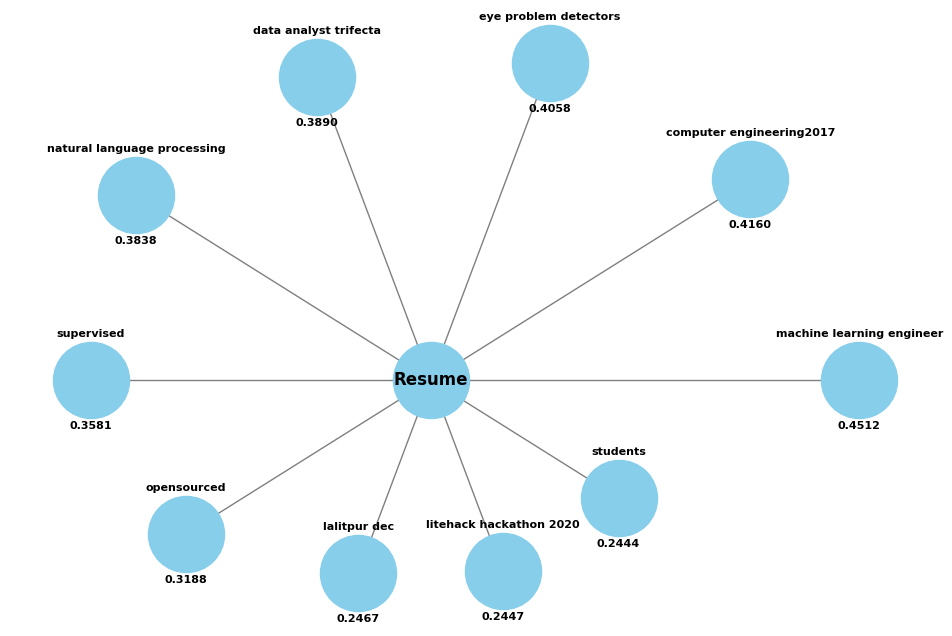

In [7]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Data
keywords = [
    "machine learning engineer",
    "computer engineering2017",
    "eye problem detectors",
    "data analyst trifecta",
    "natural language processing",
    "supervised",
    "opensourced",
    "lalitpur dec",
    "litehack hackathon 2020",
    "students"
]

# Similarity scores (normalized for visualization purposes)
similarity_scores = np.array([0.4512, 0.416, 0.4058, 0.389, 0.3838, 0.3581, 0.3188, 0.2467, 0.2447, 0.2444])

# Create a new graph
G = nx.Graph()

# Add a node for the resume
G.add_node("Resume")

# Add nodes and edges for each keyword
for keyword, score in zip(keywords, similarity_scores):
    G.add_node(keyword)
    G.add_edge("Resume", keyword, weight=score)

# Positioning the central node at the origin and others on the circumference of a circle
pos = {"Resume": (0, 0)}
# Generate positions on a circle for the keywords
circle_pos = nx.circular_layout(keywords)
# Scale the circular positions to match the similarity scores
for key, val in circle_pos.items():
    pos[key] = (val[0] * similarity_scores[keywords.index(key)], val[1] * similarity_scores[keywords.index(key)])

# # Draw the network
# fig, ax = plt.subplots(figsize=(12, 8))
# nx.draw_networkx_edges(G, pos, alpha=0.5, width=1)
# nx.draw_networkx_labels(G, pos, labels={"Resume": "Resume"}, font_weight='bold')

# # Draw the nodes and add the similarity scores as labels within the nodes
# for node, (x, y) in pos.items():
#     if node != "Resume":
#         nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color="skyblue", node_size=3000)
#         plt.text(x, y, s=f"{G.edges[('Resume', node)]['weight']:.4f}",
#                  ha='center', va='center', color='black', weight='bold')

# # Remove axes
# plt.axis('off')

# # Show plot
# plt.show()

# Redraw the graph with both the keywords and the normalized scores written inside each node
fig, ax = plt.subplots(figsize=(12, 8))

# Draw the network
nx.draw_networkx_edges(G, pos, alpha=0.5, width=1)

# Draw the central 'Resume' node and label
nx.draw_networkx_nodes(G, pos, nodelist=["Resume"], node_color="skyblue", node_size=3000)
nx.draw_networkx_labels(G, pos, labels={"Resume": "Resume"}, font_weight='bold')

# Draw the other nodes
for node, (x, y) in pos.items():
    if node != "Resume":
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color="skyblue", node_size=3000)

        # Write the keyword and its similarity score below it
        plt.text(x, y+0.05, s=node, ha='center', va='bottom', color='black', weight='bold', fontsize=8)
        plt.text(x, y-0.05, s=f"{G.edges[('Resume', node)]['weight']:.4f}", 
                 ha='center', va='top', color='black', weight='bold', fontsize=8)

# Remove axes
plt.axis('off')

# Show plot
plt.show()

